In [1]:
# importing all libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


In [2]:
# loading dataset 


df = pd.read_csv(r"C:\Users\Nikita\Desktop\nikita doc\__MACOSX\master.csv")
df.head()
#df.shape   --> (27820, 12)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
# checking which cloumns have missing values
# HDI has 19456 missing values
# filling the missing values

print(df.isnull().sum())
df=df.fillna(df.mean())

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


In [4]:
# removing years from age
# we see there are different ranges of age 
# except range 5-14years, every range has 4642 values depending on year, country and sex


#print(df['age'].str.extract('(\d+)', expand = True).head())
df['age']=df['age'].str.replace('[A-Za-z]', '')
print(df['age'].value_counts())
df['age'].head()

55-74     4642
15-24     4642
75+       4642
25-34     4642
35-54     4642
5-14      4610
Name: age, dtype: int64


0    15-24 
1    35-54 
2    15-24 
3      75+ 
4    25-34 
Name: age, dtype: object

In [5]:
# count shows, HDI has missing values
# comparing mean and median(50%), suicides_no, suicides/100k pop and gdp_per_capita ($) are not Symmetrically distributed in nature.
# suicides_no is right skewed


df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.051192,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.776601,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.776601,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.776601,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
# getting number of distinct values for each column


df.apply(lambda x: len(x.unique()))

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            306
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

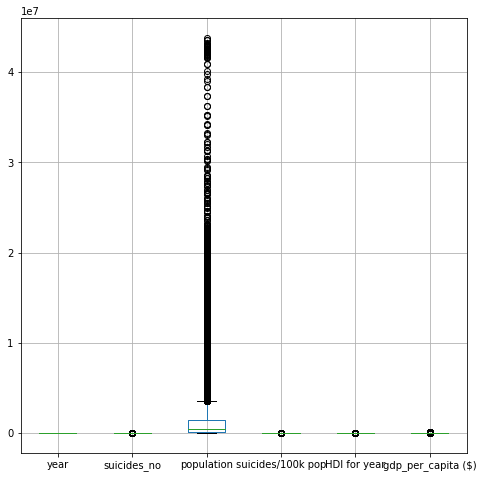

In [7]:
# shows population has alot of outliers

df.boxplot(figsize=(8,8))

In [8]:
# along with population, suicide_no and gdp_per_capita ($) have outliers too


#df=df.drop(columns=['population'])
#df.boxplot()

In [9]:
# grouping data in terms of no of sucides as per age and country 


g=df.groupby(['age','country'])['suicides_no'].count()
g.reset_index().head()

,age,country,suicides_no
0,15-24,Albania,44
1,15-24,Antigua and Barbuda,54
2,15-24,Argentina,62
3,15-24,Armenia,50
4,15-24,Aruba,28


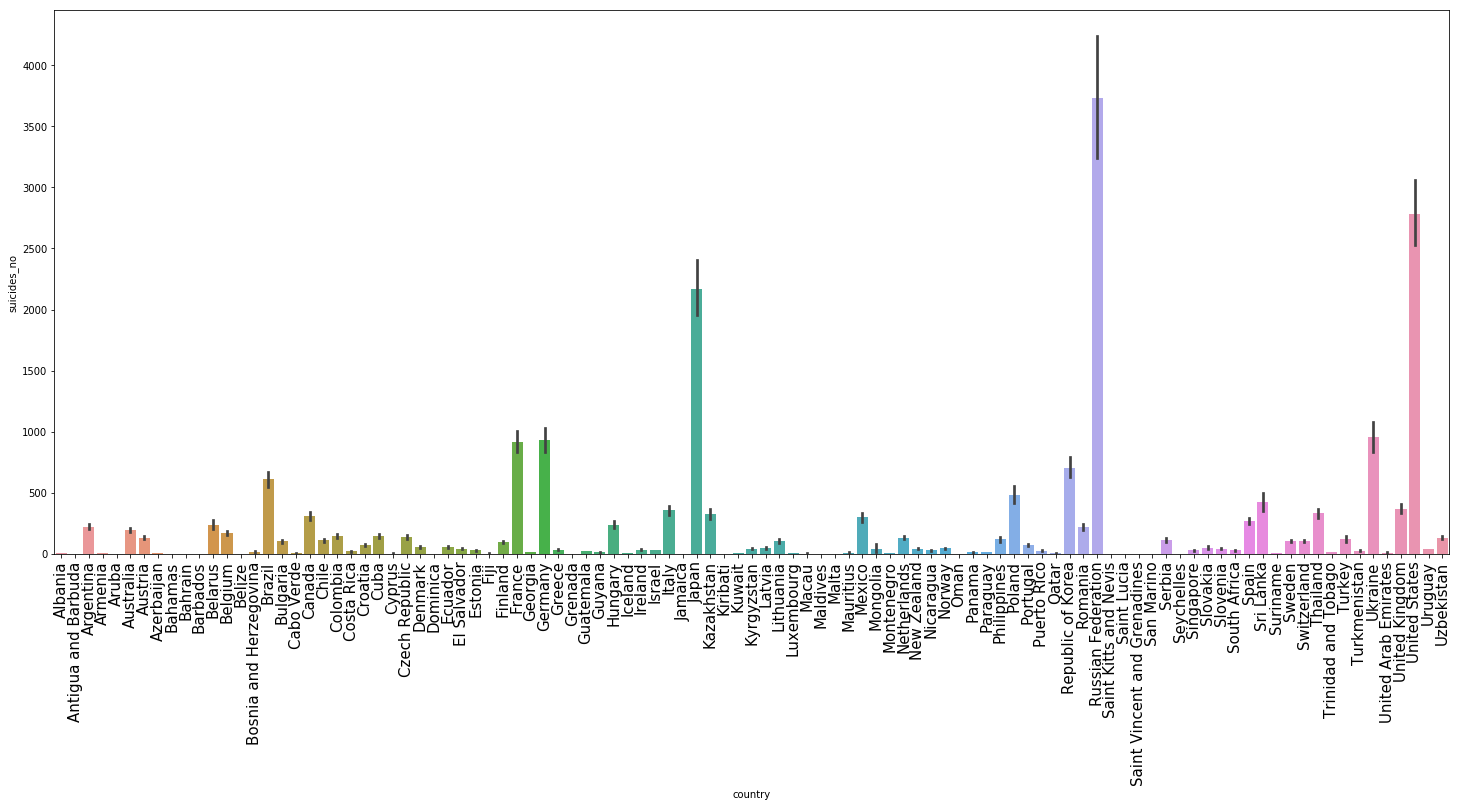

In [10]:
# visulizing the suicide number in diferent countries
# suicide is highest in Russian federation followed by United states

fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x = 'country', y = 'suicides_no', data = df)
plt.xticks(fontsize=15,rotation=90);

In [109]:
#df['age']=df['age'].str.extract('(\d+)', expand = True)
#df['age']=pd.to_numeric(df['age'])

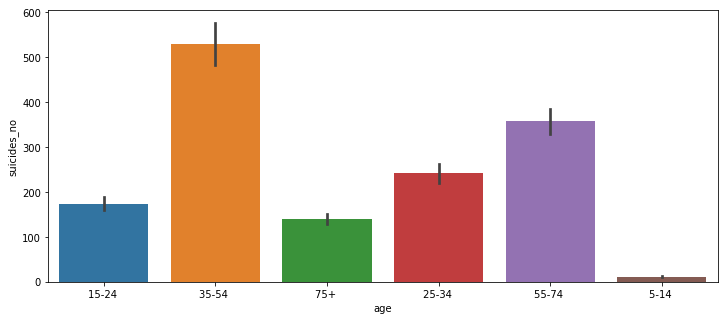

In [11]:
# number of suicides depending on age range
# highest is between 35-74

fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x = 'age', y = 'suicides_no', data = df)


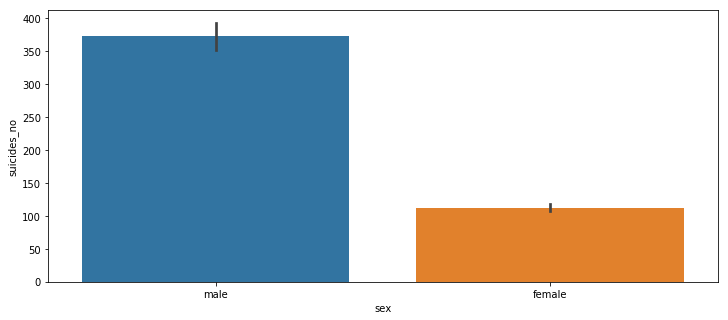

In [84]:
# Sucide numbers depending on sex


fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x = 'sex', y = 'suicides_no', data = df)


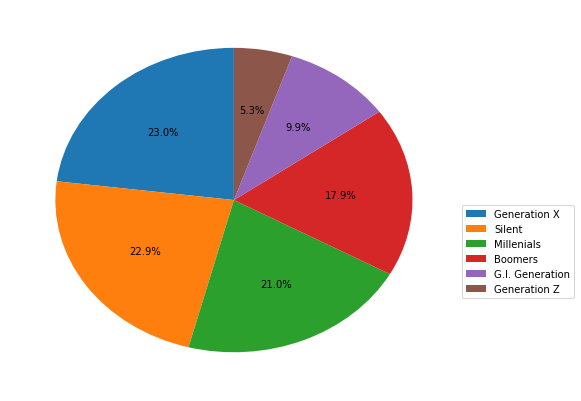

In [12]:
# percentage of suicides in different generations


col=df['generation'].value_counts()

fig, ax = plt.subplots(figsize=(8,7))
#explode = (0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4)
ax.pie(col, labels = None, autopct='%1.1f%%', startangle=90)
ax.legend(bbox_to_anchor=(1,0.5), labels=col.index)

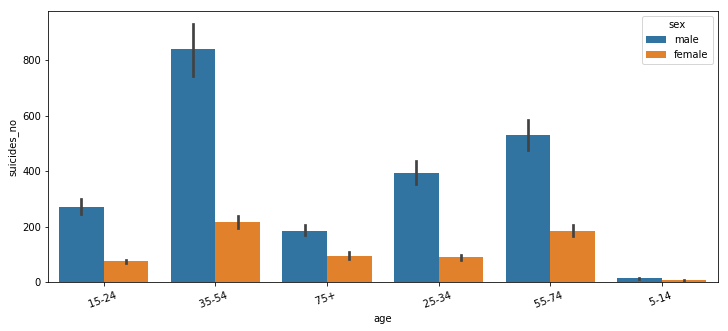

In [13]:
# graph showing number od suicides based on age and sex


fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x = 'age', y = 'suicides_no', data = df,hue = 'sex')
plt.xticks(rotation=20);

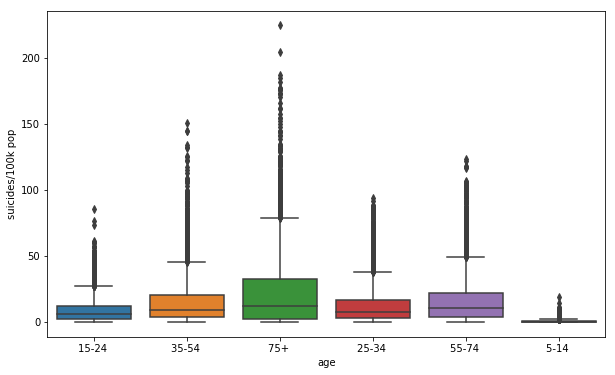

In [14]:
# boxplot of age and suicides/100k pop



plt.figure(figsize=(10,6))
sns.boxplot(x='age',y='suicides/100k pop', data=df)


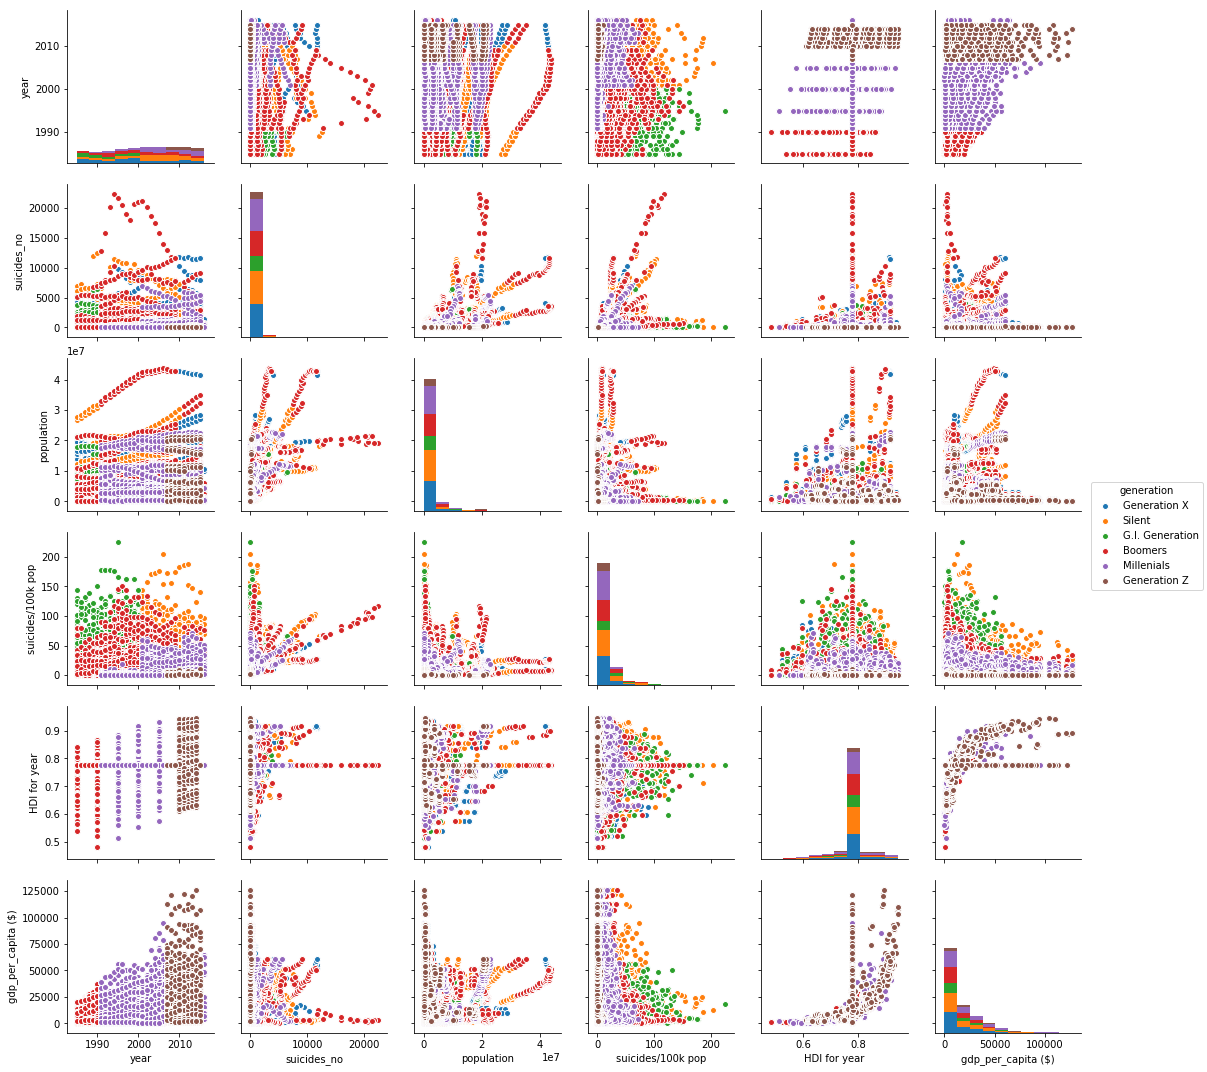

In [82]:
# seeing different features with each other, colours representing different generations
# as the colours are different for generations, we see in the first row or first col(year column), there is a prominent bifercation of data
#


sns.pairplot(df, hue = 'generation');


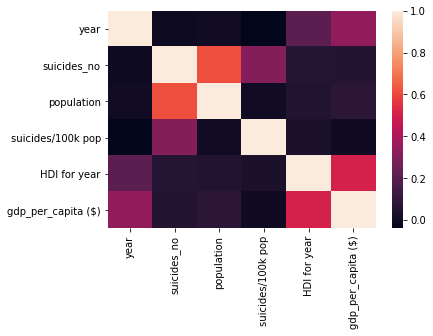

In [83]:
# correlation between different features
# we notice a slight correlation between population and suicide number

sns.heatmap(df.corr());

In [111]:
# Preprocessing before using different models



from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df = df.apply(le.fit_transform)
df.head()